## Geospatial analysis in GeoPandas

Further learning: https://autogis-site.readthedocs.io/en/latest/index.html

Norway shapefile: https://kartkatalog.geonorge.no/metadata/administrative-enheter-fylker/6093c8a8-fa80-11e6-bc64-92361f002671

GeoPandas, as the name suggests, extends the popular data science library pandas by adding support for geospatial data. If you are not familiar with pandas, we recommend taking a quick look at its Getting started documentation before proceeding.

The core data structure in GeoPandas is the geopandas.GeoDataFrame, a subclass of pandas.DataFrame, that can store geometry columns and perform spatial operations. The geopandas.GeoSeries, a subclass of pandas.Series, handles the geometries. Therefore, your GeoDataFrame is a combination of pandas.Series, with traditional data (numerical, boolean, text etc.), and geopandas.GeoSeries, with geometries (points, polygons etc.). You can have as many columns with geometries as you wish; there’s no limit typical for desktop GIS software.

Each GeoSeries can contain any geometry type (you can even mix them within a single array) and has a GeoSeries.crs attribute, which stores information about the projection (CRS stands for Coordinate Reference System). Therefore, each GeoSeries in a GeoDataFrame can be in a different projection, allowing you to have, for example, multiple versions (different projections) of the same geometry.

Only one GeoSeries in a GeoDataFrame is considered the active geometry, which means that all geometric operations applied to a GeoDataFrame operate on this active column.

In [1]:
import geopandas as gpd

### Reading files

Assuming you have a file containing both data and geometry (e.g. GeoPackage, GeoJSON, Shapefile), you can read it using geopandas.read_file(), which automatically detects the filetype and creates a GeoDataFrame. This tutorial uses the "nybb" dataset, a map of New York boroughs, which is part of the GeoPandas installation. Therefore, we use geopandas.datasets.get_path() to retrieve the path to the dataset.

In [2]:
gdf = gpd.read_file('../data/trafikkregistreringsstasjoner_e6.geojson')

In [3]:
gdf

Registreringsnivå  Antall kjørefelt                    Status  \
0    Kontinuerlig (Nivå 1)               2.0                  Operativ   
1    Kontinuerlig (Nivå 1)               6.0                  Operativ   
2    Kontinuerlig (Nivå 1)               4.0                  Operativ   
3    Kontinuerlig (Nivå 1)               6.0  Midlertidig ute av drift   
4    Kontinuerlig (Nivå 1)               2.0                  Operativ   
..                     ...               ...                       ...   
242  Kontinuerlig (Nivå 1)               NaN                  Operativ   
243  Kontinuerlig (Nivå 1)               NaN                  Operativ   
244  Kontinuerlig (Nivå 1)               NaN                  Operativ   
245  Kontinuerlig (Nivå 1)               NaN                  Operativ   
246  Kontinuerlig (Nivå 1)               NaN                  Operativ   

                       Stasjonsnavn  Målestasjonsnummer          id  \
0                          BIRI SØR              500513   370075065   
1                         SKULLERUD              300039   370075067   
2                      LEIRELVA BRU              200211   370075069   
3                   E6 V/KARIHAUGEN              300349   370075137   
4                  Nordkjosbotn sør             1900211   370075139   
..                              ...                 ...         ...   
242              LANGFJORDBOTN X882             2000009  1014031313   
243                     Bjørkheim X             3000367  1014047386   
244  E6 Alnabru Nordgående Morpunkt              300146  1014062385   
245                           Grong             1700019  1014067467   
246                    E6 SYNSTERUD             3000501  1014096768   

                                              metadata  \
0    {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
1    {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
2    {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
3    {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
4    {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
..                                                 ...   
242  {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
243  {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
244  {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
245  {'type': {'id': 482, 'navn': 'Trafikkregistrer...   
246  {'type': {'id': 482, 'navn': 'Trafikkregistrer...   

                                             vegsystem  \
0    {'id': 1002317285, 'versjon': 1, 'vegkategori'...   
1    {'id': 1006190638, 'versjon': 1, 'vegkategori'...   
2    {'id': 1002316638, 'versjon': 1, 'vegkategori'...   
3    {'id': 1002316825, 'versjon': 1, 'vegkategori'...   
4    {'id': 1006190674, 'versjon': 1, 'vegkategori'...   
..                                                 ...   
242  {'id': 1006190681, 'versjon': 1, 'vegkategori'...   
243  {'id': 1006190636, 'versjon': 1, 'vegkategori'...   
244  {'id': 1006190639, 'versjon': 1, 'vegkategori'...   
245  {'id': 1002317857, 'versjon': 1, 'vegkategori'...   
246  {'id': 1002317896, 'versjon': 1, 'vegkategori'...   

                                             strekning           kortform  \
0    {'id': -1, 'versjon': -1, 'strekning': 34, 'de...    EV6 S34D1 m1024   
1    {'id': -1, 'versjon': -1, 'strekning': 15, 'de...    EV6 S15D1 m5271   
2    {'id': -1, 'versjon': -1, 'strekning': 20, 'de...    EV6 S20D1 m5058   
3    {'id': -1, 'versjon': -1, 'strekning': 17, 'de...    EV6 S17D1 m5998   
4    {'id': -1, 'versjon': -1, 'strekning': 179, 'd...  EV6 S179D1 m12163   
..                                                 ...                ...   
242  {'id': -1, 'versjon': -1, 'strekning': 199, 'd...   EV6 S199D1 m1854   
243  {'id': -1, 'versjon': -1, 'strekning': 243, 'd...   EV6 S243D1 m7212   
244  {'id': -1, 'versjon': -1, 'strekning': 16, 'de...    EV6 S16D1 m6497   
245  {'id': -1, 'versjon': -1, 'strekning': 97, 'de...    EV6 S97D1 m9121   
246  {'id': -1, 'versjon':

### Writing files

To write a GeoDataFrame back to file use GeoDataFrame.to_file(). The default file format is Shapefile, but you can specify your own with the driver keyword.

In [4]:
gdf.to_file("my_file.geojson", driver="GeoJSON")

### Built-in functions

In [5]:
norge = gpd.read_file('../data/norge.geojson')

In [6]:
norge

objtype samiskforvaltningsomrade                               lokalid  \
0    Fylke                    false  3a65f9e4-23d5-4c05-b188-8f4ea8463f8b   
1    Fylke                    false  6fa6cac4-9f86-4cbf-9ae4-716eb5059541   
2    Fylke                       JA  545cbfe3-2f34-4792-a9e9-135375accefd   
3    Fylke                    false  ab9f3402-23fb-48b4-a4fd-dbe4e3cc321b   
4    Fylke                    false  22642144-2de8-4e9d-bea0-0520fb44e85a   
5    Fylke                       JA  ea3b82cf-f063-41a9-a19c-449832aadf3a   
6    Fylke                    false  e70c69ba-5bea-48a8-952c-b4860ada5afa   
7    Fylke                    false  f96e22cd-cd45-48a3-99b8-a3d5b78c76b4   
8    Fylke                    false  f2e85556-471b-4807-a1bf-6da7478e7cda   
9    Fylke                       JA  ee7fa255-8172-47f2-8f83-6076ccf1bb4f   
10   Fylke                    false                          173150173151   

                                             navnerom versjonid  \
0   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
1   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
2   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
3   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
4   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
5   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
6   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
7   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
8   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
9   http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   
10  http://skjema.geonorge.no/SOSI/produktspesifik...       4.1   

   datafangstdato oppdateringsdato  datauttaksdato opphav fylkesnummer  \
0                   20190301000000  20211209122812   None           42   
1                   20200207000000  20211209122812   None           03   
2                   20200207000000  20211209122812   None           54   
3                   20200207000000  20211209122812   None           15   
4                   20190913000000  20211209122812   None           38   
5                   20200207000000  20211209122812   None           50   
6                   20200207000000  20211209122812   None           11   
7                   20190225000000  20211209122812   None           34   
8                   20190225000000  20211209122812   None           30   
9                   20211115000000  20211209122812   None           18   
10                  20200207000000  20211209122813   None           46   

                                                 navn  \
0   [ { "navn": "Agder", "objtype": "Administrativ...   
1   [ { "navn": "Oslo", "objtype": "AdministrativE...   
2   [ { "navn": "Troms og Finnmark", "objtype": "A...   
3   [ { "navn": "Møre og Romsdal", "objtype": "Adm...   
4   [ { "navn": "Vestfold og Telemark", "objtype":...   
5   [ { "navn": "Trøndelag", "objtype": "Administr...   
6   [ { "navn": "Rogaland", "objtype": "Administra...   
7   [ { "navn": "Innlandet", "objtype": "Administr...   
8   [ { "navn": "Viken", "objtype": "Administrativ...   
9   [ { "navn": "Nordland", "objtype": "Administra...   
10  [ { "navn": "Vestland", "objtype": "Administra...   

                                             geometry  
0   POLYGON ((12650.920 6523939.770, 12654.850 652...  
1   POLYGON ((255493.650 6656227.710, 255593.360 6...  
2   POLYGON ((701859.740 7853460.760, 680484.030 7...  
3   POLYGON ((-20575.890 6963321.310, -25091.800 6...  
4   POLYGON ((78548.430 6606728.760, 78556.900 660...  
5   POLYGON ((228157.810 7170172.040, 207751.950 7...  
6   POLYGON ((-92079.540 6636303.790, -96094.590 6...  
7   POLYGON ((125061.480 6809053.300, 125036.470 6...  
8   POLYGON ((162857.290 6678845.090, 163199.630 6...  
9   POLYGON ((372929.380 7521632.830, 360585.200 7...  
10  POLYGON ((-86165.900 6792746.680, -84865.720 6...

### Projections

Each GeoSeries has its Coordinate Reference System (CRS) accessible at GeoSeries.crs. The CRS tells GeoPandas where the coordinates of the geometries are located on the earth’s surface. In some cases, the CRS is geographic, which means that the coordinates are in latitude and longitude. In those cases, its CRS is WGS84, with the authority code EPSG:4326. Let’s see the projection of our Norway GeoDataFrame.

In [7]:
norge.crs

<Derived Projected CRS: EPSG:25833>
Name: ETRS89 / UTM zone 33N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 12°E and 18°E: Austria; Denmark - offshore and offshore; Germany - onshore and offshore; Norway including Svalbard - onshore and offshore.
- bounds: (12.0, 46.4, 18.01, 84.42)
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
norge.area

0     2.305731e+10
1     4.810366e+08
2     1.161332e+11
3     2.554877e+10
4     2.024325e+10
5     5.968706e+10
6     1.663051e+10
7     5.211183e+10
8     2.584184e+10
9     8.050724e+10
10    4.986524e+10
dtype: float64

In [9]:
norge.boundary

0     LINESTRING (12650.920 6523939.770, 12654.850 6...
1     LINESTRING (255493.650 6656227.710, 255593.360...
2     LINESTRING (701859.740 7853460.760, 680484.030...
3     LINESTRING (-20575.890 6963321.310, -25091.800...
4     LINESTRING (78548.430 6606728.760, 78556.900 6...
5     LINESTRING (228157.810 7170172.040, 207751.950...
6     LINESTRING (-92079.540 6636303.790, -96094.590...
7     LINESTRING (125061.480 6809053.300, 125036.470...
8     MULTILINESTRING ((162857.290 6678845.090, 1631...
9     LINESTRING (372929.380 7521632.830, 360585.200...
10    LINESTRING (-86165.900 6792746.680, -84865.720...
dtype: geometry

In [10]:
norge.centroid

0      POINT (76085.466 6511179.375)
1     POINT (262250.904 6656330.653)
2     POINT (821585.665 7786813.996)
3     POINT (101811.400 6977403.140)
4     POINT (154922.651 6602359.966)
5     POINT (298890.055 7093647.954)
6     POINT (-23047.568 6579824.752)
7     POINT (256976.692 6820201.705)
8     POINT (220137.581 6666944.356)
9     POINT (452632.751 7445560.745)
10     POINT (11295.203 6786847.403)
dtype: geometry

Measure distance between points:

In [11]:
point = norge.centroid.iloc[0]
norge.distance = norge.centroid.distance(point)
norge.distance

0     0.000000e+00
1     2.360645e+05
2     1.477503e+06
3     4.669330e+05
4     1.205371e+05
5     6.236277e+05
6     1.205800e+05
7     3.580732e+05
8     2.121644e+05
9     1.007401e+06
10    2.831795e+05
dtype: float64

Note that geopandas.GeoDataFrame is a subclass of pandas.DataFrame, so we have all the pandas functionality available to use on the geospatial dataset — we can even perform data manipulations with the attributes and geometry information together.

For example, to calculate the average of the distances measured above, access the `distance` column and call the `mean()` method on it:

In [12]:
norge.distance.mean()

446005.7367762395

### Making maps

GeoPandas can also plot maps, so we can check how the geometries appear in space. To plot the active geometry, call GeoDataFrame.plot(). To color code by another column, pass in that column as the first argument. In the example below, we plot the active geometry column and color code by the "area" column. We also want to show a legend (legend=True).

<AxesSubplot: >

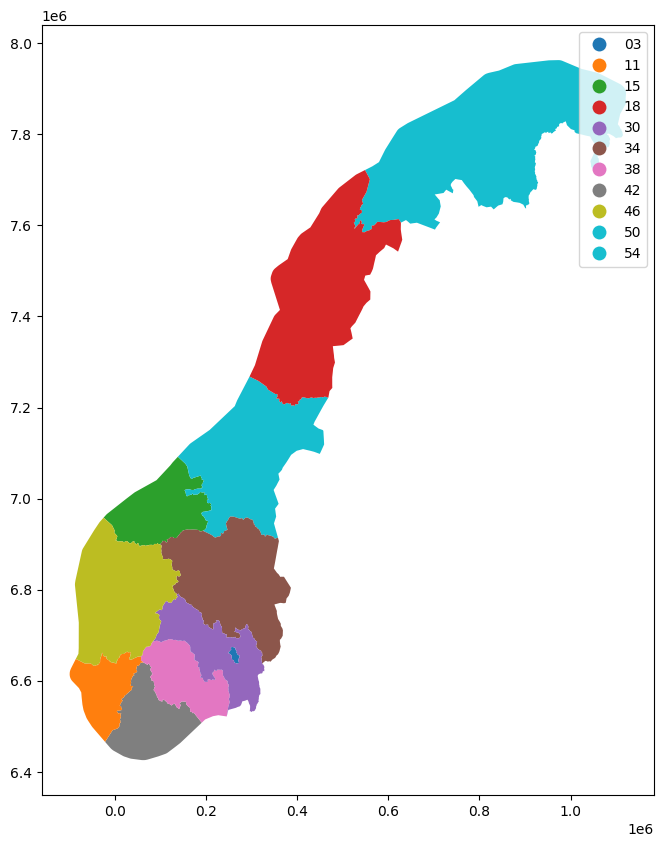

In [13]:
norge.plot('fylkesnummer', legend=True, figsize=(10,10))

In [14]:
norge.explore('fylkesnummer', legend=True)

Let's plot E6 traffic registration stations on the map of Norway

<AxesSubplot: >

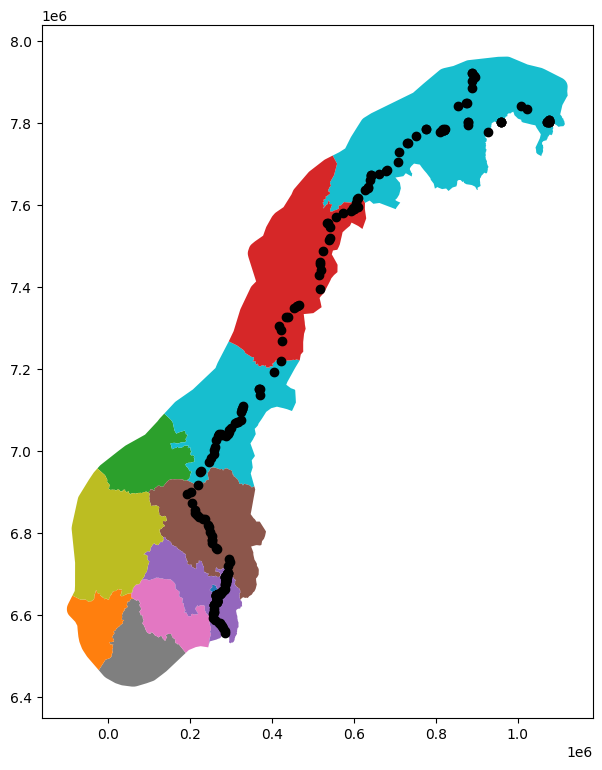

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,9))
ax.set_aspect('equal')
norge.plot('fylkesnummer', ax=ax)
gdf.plot(ax=ax, color='black')

### Geojson data from Vegkart

A lot of interesting open data is available from Statens Vegvesen via Vegkart: https://vegkart.atlas.vegvesen.no/ 

All available data is listed in the Datakatalog: https://datakatalogen.vegdata.no/

We now learn how to import this data into Geopandas. There is a Python library available to extract data from Vegkart: https://github.com/LtGlahn/nvdbapi-V3. However, version 3 of this package does not include the functionality to convert the data to GeoJSON format. I've extracted that code from version 2 of nvdbapi and imported it into my own fork of version 3: https://github.com/alexdiem/nvdbapi-V3. We will use this code to import Vegkart data into GeoPandas.

In [16]:
import nvdbapiv3 as nvdb
from nvdbapiv3 import nvdb2geojson

The data saved in Vegkart is encoded into numerical IDs according to Datakatalog:

In [17]:
q = nvdb.nvdbFagdata(482) # Trafikkregistreringsstasjoner

# (Status=Operativ OR Status=Midlertidig ute av drift) AND Trafikantgruppe=Sykkel
q.filter({"egenskap": "(5201=7081 OR 5201=12987) AND 9293=12993"})

/home/alexandra/nvdbapi-V3/nvdbapiv3/nvdbapiv3.py:439: UserWarning: 
You should provide the file nvdbapi-clientinfo.json 
 
{ "X-Client" : "YOUR SYSTEM",
 "X-Kontaktperson" : "ola.nordmann@eposten.din" }

  warn( mytext )


In [18]:
q_geo = nvdb2geojson.fagdata2geojson(q)
qdf = gpd.GeoDataFrame.from_features(q_geo['features'])
qdf.set_crs(epsg=25833)

geometry Med-retning (fra)  \
0    POINT Z (-35154.256 6723313.410 19.775)             RÅDAL   
1     POINT Z (417715.609 7304550.689 4.990)           Mosjøen   
2    POINT Z (176574.332 6617039.775 80.611)               NaN   
3    POINT Z (238675.893 6577660.468 12.205)          TØNSBERG   
4     POINT Z (124920.232 6483899.846 3.788)           SENTRUM   
..                                       ...               ...   
312   POINT Z (34208.493 6924682.999 51.186)               NaN   
313   POINT Z (266873.113 6561636.866 1.978)       FREDRIKSTAD   
314  POINT Z (163130.525 6600925.045 68.807)            Bøgata   
315  POINT Z (327502.619 7076610.855 18.266)            Verdal   
316   POINT Z (50634.280 6955970.870 36.781)           Hatlane   

    Mot-retning (fra)      Registreringsnivå  Antall kjørefelt  \
0             SANDSLI  Kontinuerlig (Nivå 1)               1.0   
1           Mo i Rana  Kontinuerlig (Nivå 1)               1.0   
2                 NaN     Periodisk (Nivå 2)               1.0   
3                 NaN  Kontinuerlig (Nivå 1)               1.0   
4        ØYGARDSDALEN  Kontinuerlig (Nivå 1)               1.0   
..                ...                    ...               ...   
312               NaN  Kontinuerlig (Nivå 1)               NaN   
313       SKJÆRHALDEN  Kontinuerlig (Nivå 1)               NaN   
314         Høgskolen  Kontinuerlig (Nivå 1)               NaN   
315              Ness  Kontinuerlig (Nivå 1)               NaN   
316               Åse  Kontinuerlig (Nivå 1)               NaN   

    Sist oppdatert fra NorTraf Trafikantgruppe                    Status  \
0                   2019-03-18          Sykkel                  Operativ   
1                   2016-09-20          Sykkel                  Operativ   
2                   2015-07-10          Sykkel  Midlertidig ute av drift   
3                   2016-10-26          Sykkel                  Operativ   
4                   2016-04-12          Sykkel                  Operativ   
..                         ...             ...                       ...   
312                        NaN          Sykkel                  Operativ   
313                        NaN          Sykkel                  Operativ   
314                        NaN          Sykkel                  Operativ   
315                        NaN          Sykkel                  Operativ   
316                        NaN          Sykkel                  Operativ   

                        Stasjonsnavn  Målestasjonsnummer  ...  \
0                  HÅVARDSTUN SYKKEL             1205015  ...   
1      MOSJØEN SYKKEL NORD Barometer             1800183  ...   
2    Kongsbergvegen sykkeltellepunkt              800505  ...   
3               NØTTERØYVEIEN-SYKKEL              705010  ...   
4                 VESSØYVEIEN SYKKEL              900604  ...   
..                               ...                 ...  ...   
312                Ekset sykkeltavle             3000587  ...   
313                BUKKHOLMEN SYKKEL             3000790  ...   
314  Gullbringvegen sykkeltellepunkt             3000802  ...   
315                   Vinne - sykkel             3000455  ...   
316              Hatlane Sykkeltavle             3000803  ...   

                typeVeg     typeVeg_sosi   startdato  kommune fylke  \
0    Gang- og sykkelveg  gangOgSykkelveg  2022-09-16     4601    46   
1    Gang- og sykkelveg  gangOgSykkelveg  2022-07-04     1824    18   
2    Gang- og sykkelveg  gangOgSykkelveg  2022-09-15     3808    38   
3    Gang- og sykkelveg  gangOgSykkelveg  2022-08-12     3803    38   
4          Enkel bilveg      enkelBilveg  2022-08-01     4202    42   
..                  ...              ...         ...      ...   ...   
312  Gang- og sykkelveg  gangOgSykkelveg  2022-09-21     1577    15   
313        Enkel bilveg      enkelBilveg  2022-08-30     3011    30   
314  Gang- og sykkelveg  gangOgSykkelveg  2022-09-07     3817    38   
315  Gang- og sykkelveg  gangOgSykkelveg  2022

In [19]:
qdf.to_file("vegkart.geojson", driver='GeoJSON')

In [20]:
geojson_string = qdf.to_json()

In [21]:
import json

In [22]:
res = json.loads(geojson_string)

In [23]:
res['crs'] = {"type":"name","properties":{"name":"EPSG:25833"}}

In [24]:
res.keys()

dict_keys(['type', 'features', 'crs'])

In [27]:
import geojson

In [28]:
def save_geodf_as_json_with_crs(geodf, crs, filename):
    geojson_string = geodf.to_json()
    res = json.loads(geojson_string)
    res['crs'] = {"type":"name","properties":{"name":crs}}
    with open(filename, 'w') as fp:
        geojson.dump(res, fp)

In [29]:
save_geodf_as_json_with_crs(qdf, "EPSG:25833", 'test.geojson')